In [1]:
import numpy as np
import os
import csv
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from openpyxl import load_workbook
def get_xcel_col(sheet, col, row_start, row_end):
    vals = []
    
    for i in range(row_start, row_end):
        vals.append(sheet[col+str(i)].value)
    return vals
R = 8.314
wb = load_workbook(r'C:\Users\fletc\Desktop\PlantModeling\CombustionCode-master\Data1.xlsx')
s1 = wb['Little bluestem grass_dead']
t = get_xcel_col(s1, 'A', 11, 57)
T_c = get_xcel_col(s1, 'B', 11, 57)
T = T_c + np.array(273.15)
m_e = get_xcel_col(s1, 'D', 11, 57)
c = m_e / np.array(s1['D11'].value)
V_e = 1 - c
def r_e(V_e, t):
    dV_e = []
    dt1 = []
    dm_e = []
    for i in range(1, len(V_e)):
        dV_e.append(V_e[i] - V_e[i-1])
        dm_e.append(m_e[i]-m_e[i-1])
    for i in range(1, len(t)):
        dt1.append(t[i] - t[i-1])
    dV_e = np.array(dV_e)
    dm_e = np.array(dm_e)
    dt1 = np.array(dt1)
    r_e = dV_e / dt1
    r_em = dm_e / dt1
    return(r_e, r_em)


A1 = 50000
E1 = 80000
Y1 = .5

def r_m(A,E,Y1):
    V = np.zeros(len(t)-1)
    m = np.zeros(len(t)-1)
    dt=np.zeros(len(t)-1)
    dV = np.zeros(len(t)-1)
    dm = np.zeros(len(t)-1)
    for i in range(1, len(t)-1):
        dt[i]=t[i]-t[i-1]
    m[0] = 1
    V[0] = 0
    dm[0] = (Y1*A1*np.exp(-E1/R/T[0]))*m[0]
    dV[0] = -(A1*np.exp(-E1/R/T[0]))*m[0]

    for i in range(1, len(t)-1):
        m[i] = m[i-1]+dm[i-1]*dt[i]

        dm[i] = -(A1*np.exp(-E1/R/T[i]))*m[i]
        dV[i] = (Y1*A1*np.exp(-E1/R/T[i]))*m[i]
        V[i]=V[i-1]+dV[i-1]*dt[i]
        
    return(m, V, dV, dm)

print(len(V_e))
print(len(t))
def f(X):
    A1,E1,Y1 = X
    e1 = ((r_e(V_e, t)[0] - r_m(A1,E1,Y1)[2])**2)
    e2 = ((V_e[1:46] - r_m(A1,E1,Y1)[1]))**2
    return(sum(e1) + sum(e2))

res = minimize(f,(A1,E1,Y1))
A1,E1,Y1 = res.x
print(A1)
print(E1)
print(Y1)


e1 = (r_e(V_e, t)[0] - r_m(A1,E1,Y1)[2])**2
e2 = (V_e[1:46] - r_m(A1,E1,Y1)[1])**2

46
46
50000.0
80000.0
0.625014076503


In [3]:
t2 = get_xcel_col(s1, 'P', 11, 56)
print(len(t2))
T_c2 = get_xcel_col(s1, 'Q', 11, 56)
T2 = T_c2 + np.array(273.15)
m_e2 = get_xcel_col(s1, 'S', 11, 56)
m_n2 = m_e2 / np.array(s1['S11'].value)
V_e2 = 1 - m_n2
print(len(V_e2))

def r_e2(V_e2, t2):
    dV_e2 = []
    dt2 = []
    dm_e2 = []
    for i in range(1, len(V_e2)):
        dV_e2.append(V_e2[i] - V_e2[i-1])
        dm_e2.append(m_e2[i]-m_e2[i-1])
    for i in range(1, len(t2)):
        dt2.append(t2[i] - t2[i-1])
    dV_e2 = np.array(dV_e2)
    dm_e2 = np.array(dm_e2)
    dt2 = np.array(dt2)
    r_e2 = dV_e2/ dt2
    r_em2 = dm_e2 / dt2
    return(r_e2, r_em2)
    


A2 = 5000
E2 = 80000
Y2 = .01

def r_m2(A2,E2,Y2):
    V = np.zeros(len(t2)-1)
    m = np.zeros(len(t2)-1)
    dt2 = np.zeros(len(t2)-1)
    dV = np.zeros(len(t2)-1)
    dm = np.zeros(len(t2)-1)
    for i in range(1, len(t2)-1):
        dt2[i] = t2[i] - t2[i-1]
        
    m[0] = 1
    V[0] = 0
    dm[0] = (Y2*A2*np.exp(-E2/R/T[0]))*m[0]
    dV[0] = -(A2*np.exp(-E2/R/T[0]))*m[0]

    for i in range(1, len(t2)-1):
        m[i] = m[i-1] + dm[i-1]*dt2[i]

        dm[i] = -(A2*np.exp(-E2/R/T[i]))*m[i]
        dV[i] = (Y2*A2*np.exp(-E2/R/T[i]))*m[i]
        V[i] = V[i-1] + dV[i-1]*dt2[i]
    return(m, V, dV, dm)
def f2(X):
    A2,E2,Y2 = X
    e1 = (r_e2(V_e2, t2)[0] - r_m2(A2,E2,Y2)[2])**2
    e2 = (V_e2[1:45] - r_m2(A2,E2,Y2)[1])**2
    return(sum(e1) + sum(e2))

print(len(V_e2))
print(len(t2))

res2 = minimize(f2,(A2,E2,Y2))
A2,E2,Y2 = res2.x
print(A2)
print(E2)
print(Y2)


e1 = (r_e2(V_e2, t2)[0] - r_m2(A2,E2,Y2)[2])**2
e2 = (V_e2[1:45] - r_m2(A2,E2,Y2)[1])**2


45
45
45
45
14817.4596829
69574.0385462
0.605144365962


In [4]:
t3 = get_xcel_col(s1, 'AE', 11, 55)
T_c3 = get_xcel_col(s1, 'AF', 11, 55)
T3 = T_c3 + np.array(273.15)
m_e3 = get_xcel_col(s1, 'AH', 11, 55)
m_n3 = m_e3 / np.array(s1['AH11'].value)
V_e3 = 1 - m_n3

def r_e3(V_e3, t3):
    dV_e3 = []
    dt3 = []
    dm_e3 = []
    for i in range(1, len(V_e3)):
        dV_e3.append(V_e3[i] - V_e3[i-1])
        dm_e3.append(m_e3[i]-m_e3[i-1])
    for i in range(1, len(t3)):
        dt3.append(t3[i] - t3[i-1])
    dV_e3 = np.array(dV_e3)
    dm_e3 = np.array(dm_e3)
    dt3 = np.array(dt3)
    r_e3 = dV_e3 / dt3
    r_em3 = dm_e3 / dt3
    return(r_e3, r_em3)


A3 = 5000
E3 = 70000
Y3 = .01

def r_m3(A3,E3,Y3):
    V = np.zeros(len(t3)-1)
    m = np.zeros(len(t3)-1)
    
    dV = np.zeros(len(t3)-1)
    dm = np.zeros(len(t3)-1)
   
        
    m[0] = 1
    V[0] = 0
    dm[0] = (Y3*A3*np.exp(-E3/R/T[0]))*m[0]
    dV[0] = -(A3*np.exp(-E3/R/T[0]))*m[0]

    for i in range(1, len(t3)-1):
        m[i] = m[i-1]

        dm[i] = -(A3*np.exp(-E3/R/T[i]))*m[i]
        dV[i] = (Y3*A3*np.exp(-E3/R/T[i]))*m[i]
      
        
    return(m, V, dV, dm)
def f3(X):
    A3,E3,Y3 = X
    e1 = (r_e3(V_e3, t3)[0] - r_m3(A3,E3,Y3)[2])**2
    e2 = (V_e3[1:44] - r_m3(A3,E3,Y3)[1])**2
    return(sum(e1) + sum(e2))

print(len(V_e3))
print(len(t3))

res3 = minimize(f3,(A3,E3,Y3))
A3,E3,Y3 = res3.x
print(A3)
print(E3)
print(Y3)


e1 = (r_e3(V_e3, t3)[0] - r_m3(A3,E3,Y3)[2])**2
e2 = (V_e3[1:45] - r_m3(A3,E3,Y3)[1])**2


44
44
5000.0
70000.0
0.0127273354412


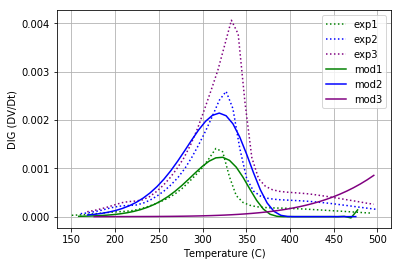

In [5]:
plt.plot(T_c[0:45],r_e(V_e,t)[0],linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c2[0:44],r_e2(V_e2,t2)[0],linestyle = ':',color = 'Blue',label='exp2')
plt.plot(T_c3[0:43],r_e3(V_e3,t3)[0],linestyle = ':',color = 'Purple',label='exp3')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.plot(T_c[1:43],r_m(A1,E1,Y1)[2][1:43],color = 'Green',label='mod1')
plt.plot(T_c2[1:41],r_m2(A2,E2,Y2)[2][1:41],color = 'Blue',label='mod2')
plt.plot(T_c3[1:43],r_m3(A3,E3,Y3)[2][1:43],color = 'Purple',label='mod3')
plt.xlabel('Temperature (C)')
plt.ylabel('DIG (DV/Dt)')
plt.legend()
plt.grid()

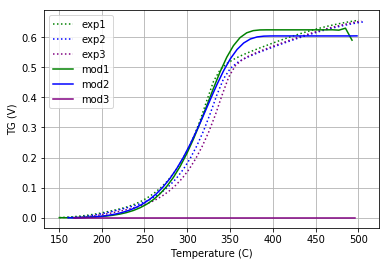

In [6]:
plt.plot(T_c,V_e,linestyle = ':',color = 'Green',label='exp1')
plt.plot(T_c2,V_e2,linestyle = ':',color = 'Blue',label='exp2')
plt.plot(T_c3,V_e3,linestyle = ':',color = 'Purple',label='exp3')
plt.xlabel('Temperature (C)')
plt.ylabel('TG (V)')
plt.plot(T_c[0:45],r_m(A1,E1,Y1)[1],'g-',label='mod1')
plt.plot(T_c2[0:44],r_m2(A2,E2,Y2)[1],'b-',label='mod2')
plt.plot(T_c3[0:43],r_m3(A3,E3,Y3)[1],linestyle ='-', color="Purple",label='mod3')
plt.xlabel('Temperature (C)')
plt.ylabel('TG (V)')
plt.legend()
plt.grid()